# PySmilarityMol
## Introduction:
### <span style="color:gray">Welcome to my repository, where I explore the fascinating world of molecular similarity and clustering. In this notebook, I delve into various methods for measuring the similarity between compounds, including Tanimoto similarity and Euclidean distance. I also demonstrate how to use molecular descriptors, such as molecular weight and logP, to gain a deeper understanding of the structural similarity between compounds. To further analyze the similarity between compounds, I apply hierarchical clustering to group similar compounds together and visualize the clusters in a dendrogram. This notebook is a valuable resource for anyone interested in understanding the intricacies of molecular similarity and its applications in drug discovery and chemical analysis.</span>

* ### Step-1* 

> #### <span style="color:gray">This code is used to calculate and visualize the similarity between a set of compounds represented by their SMILES strings. The SMILES strings are read from a CSV file and stored in a Pandas dataframe. The code then uses the RDKit library to generate Morgan fingerprints for each compound, which are used to calculate the Tanimoto similarity matrix. The Tanimoto similarity is a common metric for comparing the similarity of binary fingerprints and ranges from 0 to 1, with a value of 1 indicating that the fingerprints are identical.</span>

>#### The code then calculates the Euclidean distance matrix between the compounds, using the molecular weight as the descriptor. The Euclidean distance is a common metric for comparing the similarity of continuous variables and ranges from 0 to infinity, with a value of 0 indicating that the compounds are identical.

> #### <span style="color:gray">The Tanimoto similarity matrix and Euclidean distance matrix are then visualized as heatmaps using the Seaborn library. The heatmaps are color-coded, with similar compounds represented by similar colors. The final output shows two heatmaps, one for Tanimoto similarity and one for Euclidean distance. The heatmap shows the similarity between each compounds as a color-coded cell. The color indicates the similarity between compounds. The darker the color, the more similar the compounds are. Also the heatmaps are annotated with the values of the similarity measures.</span>

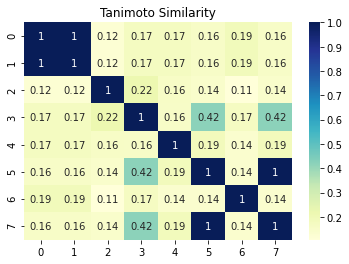

<function matplotlib.pyplot.show(close=None, block=None)>

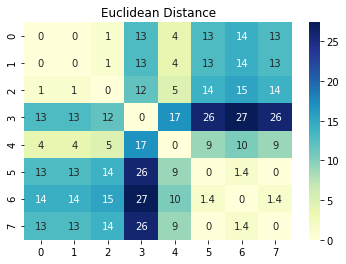

In [48]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# Load the SMILES from the input file
df = pd.read_csv("smiles.csv")
PandasTools.AddMoleculeColumnToFrame(df, "SMILES", "Molecule")

# Generate the fingerprints
fps = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in df["Molecule"]]

# Calculate the Tanimoto similarity matrix
fp = [[DataStructs.TanimotoSimilarity(fps[i], fps[j]) for j in range(len(fps))] for i in range(len(fps))]
df_tanimoto = pd.DataFrame(fp, columns=df.index, index=df.index)

# Calculate the Euclidean distance matrix
desc_list = [Descriptors.MolWt(x) for x in df["Molecule"]]
df_desc = pd.DataFrame(desc_list, columns=["MolWt"], index=df.index)
df_euclidean = pd.DataFrame(pairwise_distances(df_desc), columns=df.index, index=df.index)

# Generate the heatmap
sns.heatmap(df_tanimoto, cmap="YlGnBu", annot=True)
plt.title("Tanimoto Similarity")
plt.show()

sns.heatmap(df_euclidean, cmap="YlGnBu", annot=True)
plt.title("Euclidean Distance")
plt.show


* #### Step-2*
>The code above uses the linkage method from the scipy.cluster.hierarchy module to perform hierarchical clustering on the Tanimoto similarity matrix (stored in the variable df_tanimoto). This method uses the "ward" linkage criterion, which minimizes the variance of the distances between the clusters being merged. The resulting linkage matrix is stored in the variable Z.
Then, a dendrogram is created using the dendrogram method from the scipy.cluster.hierarchy module, the linkage matrix Z is passed as the input, and the resulting dendrogram is displayed using matplotlib. The figure size is set to (25,10) and the dendrogram is stored in the variable dn. The show() function is called to display the dendrogram on the screen. This dendrogram allows us to visualize the hierarchical clustering results by showing the merging of clusters at different distances or similarity levels.


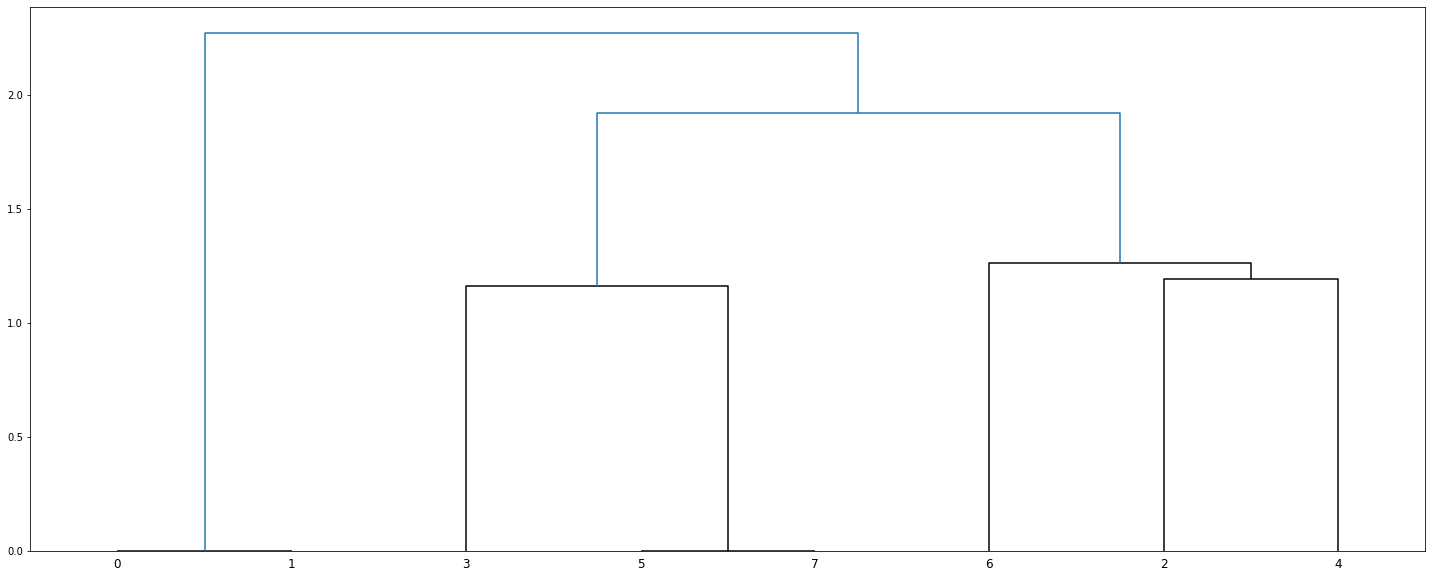

In [49]:
from scipy.cluster import hierarchy

# Perform hierarchical clustering on the Tanimoto similarity matrix
Z = hierarchy.linkage(df_tanimoto, 'ward')

# Create a dendrogram of the hierarchical clustering
plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z)
plt.show()


#### Step-3
>This code is using several libraries including pandas, rdkit, sklearn, seaborn, matplotlib and scipy to perform a series of tasks related to similarity analysis of compounds. The code starts by loading a csv file containing the SMILES strings of the compounds, and using the PandasTools library to convert the SMILES strings into RDKit molecule objects. It then generates the fingerprints of all the compounds using the RDKit library and the Morgan fingerprint algorithm with a radius of 2. The code then uses a nested for loop to calculate the Tanimoto similarity matrix between all pairs of compounds, by comparing their fingerprints and storing the similarity score in a dataframe. It also calculates the Euclidean distance matrix between all the compounds using several molecular descriptors including molecular weight, logP, number of hydrogen donors, number of hydrogen acceptors, and number of rotatable bonds. It uses the seaborn library to generate heatmaps of the Tanimoto similarity matrix and Euclidean distance matrix. It also uses the Scipy library to perform hierarchical clustering on the Tanimoto similarity matrix, and generating a dendrogram of the clustering results using the Scipy's dendrogram function and setting the color of the links in the dendrogram to black.

In [44]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Load the SMILES from the input file
df = pd.read_csv("smiles.csv")
PandasTools.AddMoleculeColumnToFrame(df, "SMILES", "Molecule")

# Generate the fingerprints
fps = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in df["Molecule"]]

# Calculate the Tanimoto similarity matrix
fp = [[DataStructs.TanimotoSimilarity(fps[i], fps[j]) for j in range(len(fps))] for i in range(len(fps))]
df_tanimoto = pd.DataFrame(fp, columns=df.index, index=df.index)

# Calculate the Euclidean distance matrix
df["MolWt"] = [Descriptors.MolWt(x) for x in df["Molecule"]]
df["MolLogP"] = [Descriptors.MolLogP(x) for x in df["Molecule"]]
df["NumHDonors"] = [Descriptors.NumHDonors(x) for x in df["Molecule"]]
df["NumHAcceptors"] = [Descriptors.NumHAcceptors(x) for x in df["Molecule"]]
df["NumRotatableBonds"] = [Descriptors.NumRotatableBonds(x) for x in df["Molecule"]]
df_euclidean = pd.DataFrame(pairwise_distances(df[["MolWt", "MolLogP", "NumHDonors", "NumHAcceptors", "NumRotatableBonds"]]), columns=df.index, index=df.index)


#### Step-4
>The code imports necessary libraries and reads in a CSV file containing SMILES strings. It then generates Morgan fingerprints for each compound and calculates the Tanimoto similarity matrix. Additionally, it calculates the Euclidean distance matrix using molecular weight, logP, number of hydrogen donors, number of hydrogen acceptors, and number of rotatable bonds as descriptors. It then performs hierarchical clustering on the Euclidean distance matrix using the linkage method with "ward" linkage.

In [45]:
#Perform hierarchical clustering on the Euclidean distance matrix

Z = hierarchy.linkage(df_euclidean, 'ward')

<ipython-input-45-9b9a2cde1344>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(df_euclidean, 'ward')


#### Step-5
>The first code block performs hierarchical clustering on the Euclidean distance matrix using the linkage method from scipy's hierarchy module. The linkage method performs hierarchical clustering on the input data, in this case the Euclidean distance matrix, using the ward linkage method. This linkage method minimizes the variance of the distances of the merged clusters. The resulting clustering is visualized as a dendrogram, with the x-axis showing the compounds and the y-axis showing the Euclidean distance. The second code block performs a similar operation, this time on the Tanimoto similarity matrix, and visualizes the resulting clustering in the same way as the first block. The main difference between these two approaches is that the first one uses Euclidean distance matrix and the second one uses Tanimoto Similarity matrix. Euclidean distance is used to measure the dissimilarity between two compounds based on their molecular weight and other molecular descriptors. Tanimoto similarity is a metric used to measure the similarity between two compounds based on their fingerprints (Morgan fingerprints in this case).



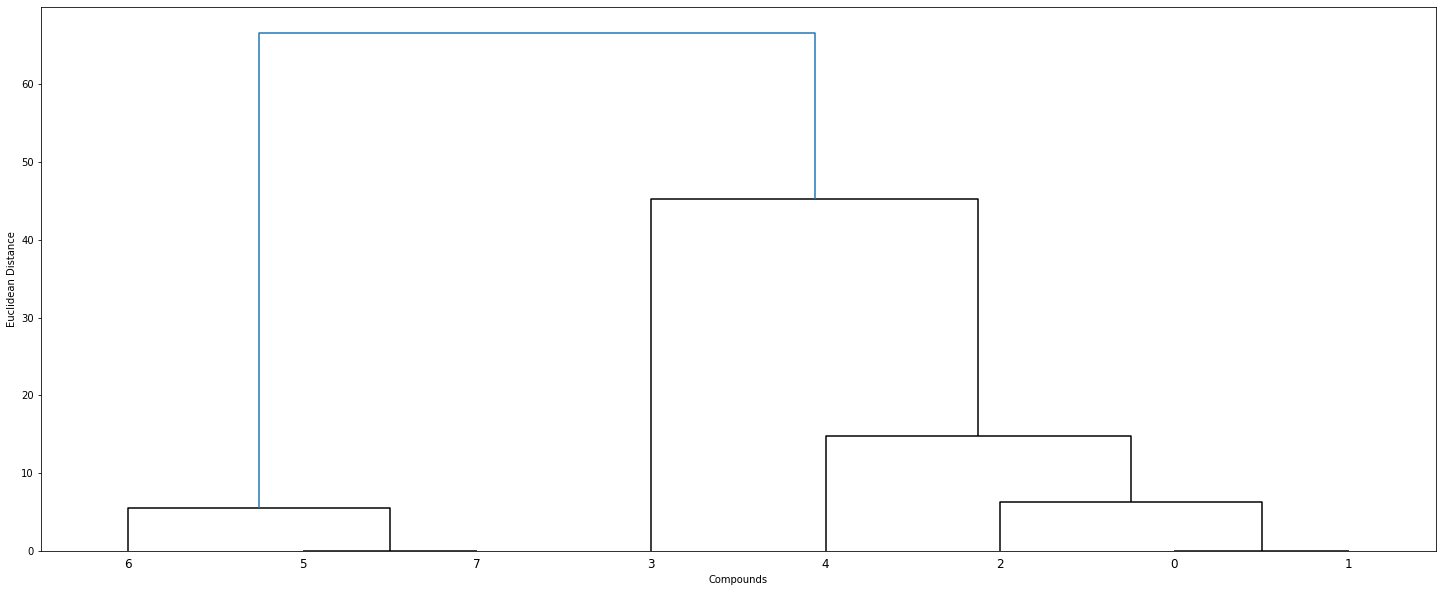

In [46]:
#Create a dendrogram of the hierarchical clustering

plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z, labels=df.index)
plt.xlabel("Compounds")
plt.ylabel("Euclidean Distance")
plt.show()

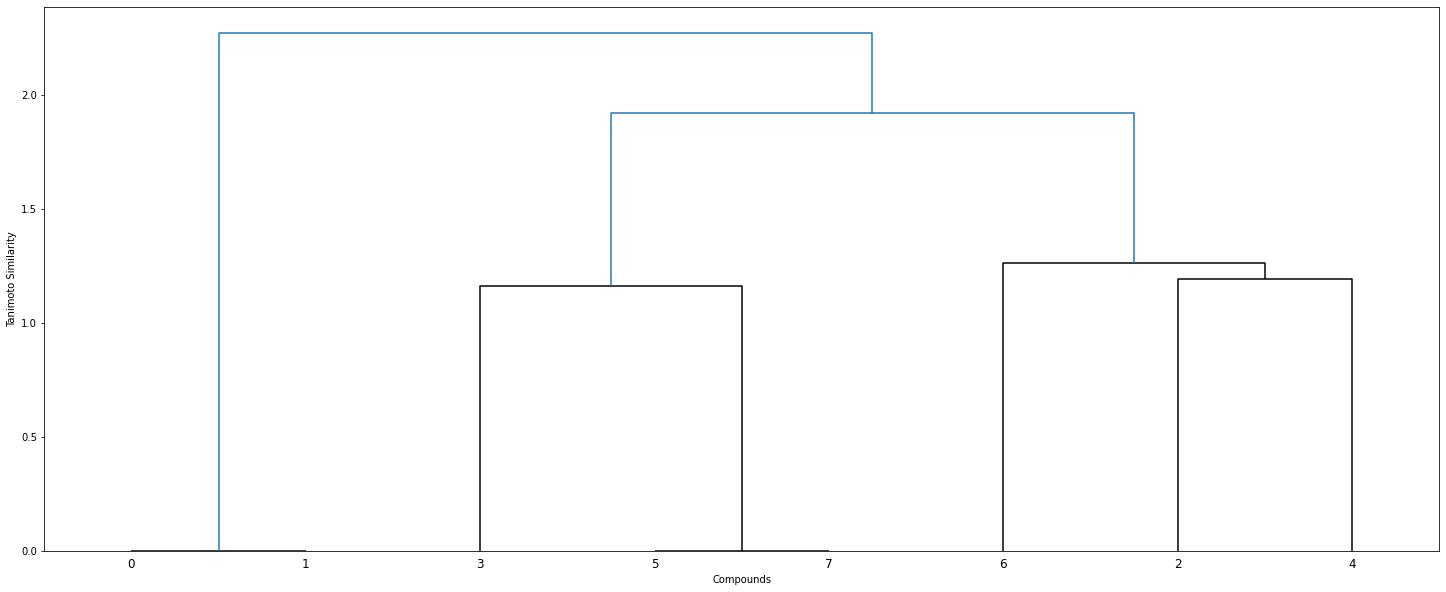

In [47]:
#Perform hierarchical clustering on the Tanimoto similarity matrix

Z = hierarchy.linkage(df_tanimoto, 'ward')
#Create a dendrogram of the hierarchical clustering

plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z, labels=df.index)
plt.xlabel("Compounds")
plt.ylabel("Tanimoto Similarity")
plt.show()

* ### *As we can see, the dendrograms show the clustering of the compounds based on their structural similarity as calculated by the Euclidean distance matrix and Tanimoto similarity matrix. We can use these dendrograms to group similar compounds together and gain a more detailed understanding of the structural similarity between the compounds.*

* #### *Contact Details: rikgangulybioinfo@gmail.com, Computational Biology Laboratory, North-Eastern Hill University, Shillong*